In [58]:
import pandas as pd
import geopandas as gpd
import duckdb

# State

In [62]:
#load shapefile
state_geo = gpd.read_file('../data/shapefiles/tl_2023_us_state/tl_2023_us_state.shp')
#select columns GEOID, geometry
state_geo = state_geo[['GEOID','NAME', 'geometry']]
# #convert GEOID10 to int
state_geo['GEOID'] = state_geo['GEOID'].astype(int)
#rename Name to state_name
state_geo.rename(columns={'NAME':'state_name'}, inplace=True)
state_geo

,GEOID,state_name,geometry
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."
5,44,Rhode Island,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,16,Idaho,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,33,New Hampshire,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,37,North Carolina,"POLYGON ((-77.89977 36.54460, -77.89942 36.544..."
9,50,Vermont,"POLYGON ((-72.04187 44.15665, -72.04180 44.156..."


In [63]:
#put state_name and GEOID into a dictionary
state_dict = dict(zip(state_geo['GEOID'],state_geo['state_name'], ))
state_dict

{54: 'West Virginia',
 12: 'Florida',
 17: 'Illinois',
 27: 'Minnesota',
 24: 'Maryland',
 44: 'Rhode Island',
 16: 'Idaho',
 33: 'New Hampshire',
 37: 'North Carolina',
 50: 'Vermont',
 9: 'Connecticut',
 10: 'Delaware',
 35: 'New Mexico',
 6: 'California',
 34: 'New Jersey',
 55: 'Wisconsin',
 41: 'Oregon',
 31: 'Nebraska',
 42: 'Pennsylvania',
 53: 'Washington',
 22: 'Louisiana',
 13: 'Georgia',
 1: 'Alabama',
 49: 'Utah',
 39: 'Ohio',
 48: 'Texas',
 8: 'Colorado',
 45: 'South Carolina',
 40: 'Oklahoma',
 47: 'Tennessee',
 56: 'Wyoming',
 15: 'Hawaii',
 38: 'North Dakota',
 21: 'Kentucky',
 78: 'United States Virgin Islands',
 69: 'Commonwealth of the Northern Mariana Islands',
 66: 'Guam',
 23: 'Maine',
 36: 'New York',
 32: 'Nevada',
 2: 'Alaska',
 60: 'American Samoa',
 26: 'Michigan',
 5: 'Arkansas',
 28: 'Mississippi',
 29: 'Missouri',
 30: 'Montana',
 20: 'Kansas',
 18: 'Indiana',
 72: 'Puerto Rico',
 46: 'South Dakota',
 25: 'Massachusetts',
 51: 'Virginia',
 11: 'District of

In [64]:
#read in state population data
state_pop = pd.read_csv('../data/csv/ACS2022-state-ppl.csv')
#only get GEOID and SE_A01001_002
state_pop = state_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
state_pop = state_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})

In [60]:
#read in state walk to work data
state_work = pd.read_csv('../data/csv/ACS2022-state-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
state_work = state_work[['Geo_FIPS', 'SE_A09005_001','SE_A09005_003','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
state_work= state_work.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_003':'transit_to_work_ppl','SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
state_work['walk_to_work_percent'] = state_work['walk_to_work_ppl']/state_work['working_ppl']
#create a new column transit_to_work_percent
state_work['transit_to_work_percent'] = state_work['transit_to_work_ppl']/state_work['working_ppl']
state_work = state_work[['GEOID', 'transit_to_work_percent', 'walk_to_work_percent']]
state_work.head()

,GEOID,transit_to_work_percent,walk_to_work_percent
0,1,0.003771,0.011017
1,2,0.015393,0.077019
2,4,0.014370,0.016875
3,5,0.003333,0.015007
4,6,0.038160,0.023834


In [65]:
#merge state_geo and state_pop
state = state_geo.merge(state_pop, on='GEOID')
#merge state and state_walk
state = state.merge(state_work, on='GEOID')
state.head()

,GEOID,state_name,geometry,ppl_density,transit_to_work_percent,walk_to_work_percent
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.57889,0.007001,0.025922
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.22420,0.015766,0.013520
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.81260,0.073379,0.026866
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.52052,0.026202,0.025974
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.49790,0.059331,0.019189


In [12]:
#get the max and min of ppl_density
max_ppl = state['ppl_density'].max()
min_ppl = state['ppl_density'].min()

In [13]:
print(min_ppl)
print(max_ppl)

1.286849
10970.53


<Axes: >

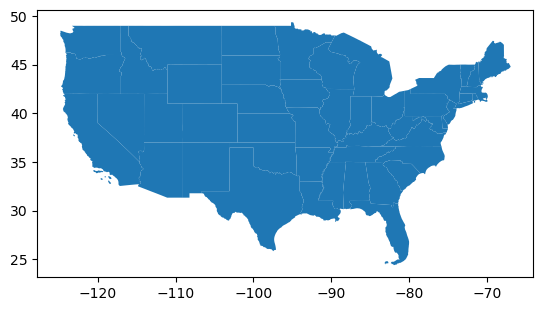

In [66]:
#limit the map to the contiguous US
state = state.cx[-125:-66, 25:50]
state.plot()

In [16]:
#get total bounds of the 
print (state.total_bounds)

[-124.848974   24.396308  -66.885444   49.384479]


In [67]:
#get the centroid of each state
state['centroid'] = state.centroid
#change centroid to two columns centroid_lat and centroid_lon
state['c_lat'] = state['centroid'].apply(lambda x: x.y)
state['c_lon'] = state['centroid'].apply(lambda x: x.x)
state.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_75167/3892722596.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  state['centroid'] = state.centroid


,GEOID,state_name,geometry,ppl_density,transit_to_work_percent,walk_to_work_percent,centroid,c_lat,c_lon
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.57889,0.007001,0.025922,POINT (-80.61371 38.64257),38.642567,-80.613707
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.22420,0.015766,0.013520,POINT (-82.54411 28.42369),28.423686,-82.544110
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.81260,0.073379,0.026866,POINT (-89.14863 40.12420),40.124202,-89.148634
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.52052,0.026202,0.025974,POINT (-94.19831 46.34937),46.349372,-94.198314
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.49790,0.059331,0.019189,POINT (-76.68718 38.94649),38.946494,-76.687177


/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/812696224.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  state.centroid.plot(ax = state.plot(), color = 'red')


<Axes: >

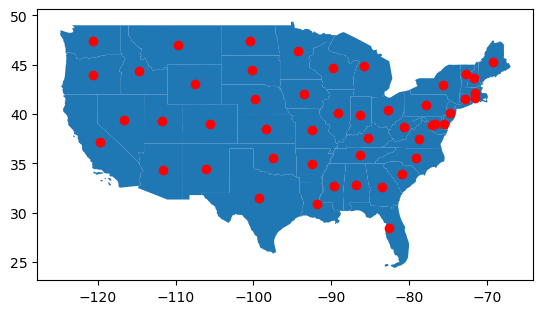

In [21]:
#plot state then overlay the centroid
state.centroid.plot(ax = state.plot(), color = 'red')


In [68]:
# change the column order to have geometry at the end
state = state[['GEOID', 'state_name', 'ppl_density',  'transit_to_work_percent',  'walk_to_work_percent', 'c_lat', 'c_lon', 'geometry']]
state.head()

,GEOID,state_name,ppl_density,transit_to_work_percent,walk_to_work_percent,c_lat,c_lon,geometry
0,54,West Virginia,74.57889,0.007001,0.025922,38.642567,-80.613707,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,403.22420,0.015766,0.013520,28.423686,-82.544110,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,229.81260,0.073379,0.026866,40.124202,-89.148634,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,71.52052,0.026202,0.025974,46.349372,-94.198314,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,634.49790,0.059331,0.019189,38.946494,-76.687177,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [69]:
#export to shapefile
state.to_file('../data/processed/00_state/state.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_75167/2838198620.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  state.to_file('../data/processed/00_state/state.shp')


# County

In [80]:
# ready county data
county_geo = gpd.read_file('../data/shapefiles/tl_2023_us_county/tl_2023_us_county.shp')
#select columns GEOID, geometry
county_geo = county_geo[['GEOID', 'geometry', 'NAME', 'STATEFP']]
#convert GEOID10 to int
county_geo['GEOID'] = county_geo['GEOID'].astype(int)
county_geo

,GEOID,geometry,NAME,STATEFP
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",Cuming,31
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",Wahkiakum,53
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",De Baca,35
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",Lancaster,31
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",Nuckolls,31
...,...,...,...,...
3230,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577...",Gilmer,13
3231,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885...",Roseau,27
3232,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400...",Madison,28
3233,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2...",Howard,48


In [81]:
# change statefp to int and replace statefp with state_name using state_dict
county_geo['STATEFP'] = county_geo['STATEFP'].astype(int)
county_geo['state_name'] = county_geo['STATEFP'].map(state_dict)
#drop statefp
county_geo = county_geo.drop(columns='STATEFP')
#change name to county_name
county_geo.rename(columns={'NAME':'county_name'}, inplace=True)
county_geo.head()

,GEOID,geometry,county_name,state_name
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",Cuming,Nebraska
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",Wahkiakum,Washington
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",De Baca,New Mexico
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",Lancaster,Nebraska
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",Nuckolls,Nebraska


In [82]:
# read in population data per county
county_pop = pd.read_csv('../data/csv/ACS2022-county-ppl.csv')
#only get GEOID and SE_A01001_002
county_pop = county_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
county_pop = county_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
county_pop

,GEOID,ppl_density
0,1001,98.84851
1,1003,146.81770
2,1005,28.10935
3,1007,35.74633
4,1009,91.60778
...,...,...
3217,72145,1181.76900
3218,72147,161.43440
3219,72149,616.89250
3220,72151,549.00320


In [83]:
#read in walk to work data per county
county_work = pd.read_csv('../data/csv/ACS2022-county-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
county_work= county_work[['Geo_FIPS', 'SE_A09005_001','SE_A09005_003','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
county_work = county_work.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_003':'transit_to_work_ppl','SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
county_work['walk_to_work_percent'] = county_work['walk_to_work_ppl']/county_work['working_ppl']
#create a new column transit_to_work_percent
county_work['transit_to_work_percent'] = county_work['transit_to_work_ppl']/county_work['working_ppl']
county_work = county_work[['GEOID','transit_to_work_percent', 'walk_to_work_percent']]
county_work.head()

,GEOID,transit_to_work_percent,walk_to_work_percent
0,1001,0.005623,0.004846
1,1003,0.001181,0.012081
2,1005,0.001319,0.024457
3,1007,0.000000,0.007316
4,1009,0.000000,0.008811


In [84]:
#merge county_geo and county_pop
county = county_geo.merge(county_pop, on='GEOID')
#merge county and county_walk
county = county.merge(county_work, on='GEOID')
county

,GEOID,geometry,county_name,state_name,ppl_density,transit_to_work_percent,walk_to_work_percent
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",Cuming,Nebraska,15.775040,0.000000,0.017324
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",Wahkiakum,Washington,17.023660,0.002581,0.041935
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",De Baca,New Mexico,0.729626,0.000000,0.056787
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",Lancaster,Nebraska,384.524800,0.009055,0.030294
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",Nuckolls,Nebraska,7.114601,0.000000,0.045455
...,...,...,...,...,...,...,...
3217,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577...",Gilmer,Georgia,73.950830,0.002572,0.008928
3218,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885...",Roseau,Minnesota,9.148537,0.001804,0.025258
3219,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400...",Madison,Mississippi,152.944400,0.000753,0.005686
3220,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2...",Howard,Texas,38.286330,0.000000,0.010094


In [85]:
#limit the map to the contiguous US
county = county.cx[-125:-66, 25:50]

In [32]:
# #limit to only the west coast
# county = county.cx[-125:-100, 30:50]

<Axes: >

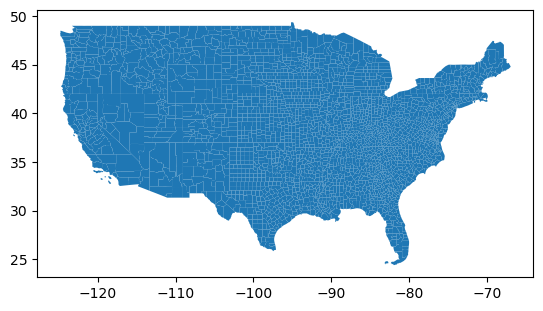

In [21]:
county.plot()

In [86]:
#get the centroid of each county
county['centroid'] = county.centroid
#change centroid to two columns centroid_lat and centroid_lon
county['c_lat'] = county['centroid'].apply(lambda x: x.y)
county['c_lon'] = county['centroid'].apply(lambda x: x.x)
#drop the centroid column
county = county.drop(columns=['centroid'])
county.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_75167/1849564452.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county['centroid'] = county.centroid
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/chuli/opt/anaconda3/envs/spatial-db/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,GEOID,geometry,county_name,state_name,ppl_density,transit_to_work_percent,walk_to_work_percent,c_lat,c_lon
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",Cuming,Nebraska,15.775040,0.000000,0.017324,41.916404,-96.787401
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",Wahkiakum,Washington,17.023660,0.002581,0.041935,46.291134,-123.433470
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",De Baca,New Mexico,0.729626,0.000000,0.056787,34.342414,-104.411958
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",Lancaster,Nebraska,384.524800,0.009055,0.030294,40.784174,-96.687756
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",Nuckolls,Nebraska,7.114601,0.000000,0.045455,40.176380,-98.047185


In [73]:
#county.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'quantiles', k=10)


In [87]:
#change the column order to have geometry at the end
county = county[['GEOID', 'ppl_density','transit_to_work_percent','walk_to_work_percent', 'state_name', 'county_name', 'c_lat', 'c_lon', 'geometry']]
county.head()

,GEOID,ppl_density,transit_to_work_percent,walk_to_work_percent,state_name,county_name,c_lat,c_lon,geometry
0,31039,15.775040,0.000000,0.017324,Nebraska,Cuming,41.916404,-96.787401,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53069,17.023660,0.002581,0.041935,Washington,Wahkiakum,46.291134,-123.433470,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35011,0.729626,0.000000,0.056787,New Mexico,De Baca,34.342414,-104.411958,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31109,384.524800,0.009055,0.030294,Nebraska,Lancaster,40.784174,-96.687756,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31129,7.114601,0.000000,0.045455,Nebraska,Nuckolls,40.176380,-98.047185,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [88]:
#export to shapefile
county.to_file('../data/processed/01_county/full_county.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_75167/3983626092.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county.to_file('../data/processed/01_county/full_county.shp')


# Tract

This is the census tract for Washington State only

In [38]:
# read in tract data
tract_geo = gpd.read_file('../data/shapefiles/tl_2023_53_tract/tl_2023_53_tract.shp')
#keep only GEOID and geometry
tract_geo = tract_geo[['GEOID', 'geometry']]
#convert GEOID10 to int
tract_geo['GEOID'] = tract_geo['GEOID'].astype(int)
tract_geo

,GEOID,geometry
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6..."
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8..."
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8..."
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1..."
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7..."
...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6..."
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6..."
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6..."
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6..."


In [39]:
#read in population data per tract
tract_pop = pd.read_csv('../data/csv/ACS2022-wa-tract-ppl.csv')
#only get GEOID and SE_A01001_002
tract_pop = tract_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
tract_pop = tract_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
tract_pop

,GEOID,ppl_density
0,53001950100,3.944901
1,53001950200,2.333721
2,53001950301,10.007000
3,53001950302,40.353790
4,53001950303,61.709050
...,...,...
1779,53077940003,3.832850
1780,53077940005,2438.063000
1781,53077940006,2700.322000
1782,53077940007,1800.856000


In [40]:
# read in walk to work data per tract
tract_walk = pd.read_csv('../data/csv/ACS2022-wa-tract-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
tract_walk = tract_walk[['Geo_FIPS', 'SE_A09005_001','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
tract_walk = tract_walk.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
tract_walk['walk_to_work_percent'] = tract_walk['walk_to_work_ppl']/tract_walk['working_ppl']
tract_walk = tract_walk[['GEOID', 'walk_to_work_percent']]
tract_walk.head()

,GEOID,walk_to_work_percent
0,53001950100,0.071076
1,53001950200,0.050286
2,53001950301,0.000000
3,53001950302,0.026622
4,53001950303,0.000000


In [43]:
#merge tract_geo and tract_pop
tract = tract_geo.merge(tract_pop, on='GEOID')
#merge tract and tract_walk
tract = tract.merge(tract_walk, on='GEOID')
#delete rows with NaN
tract = tract.dropna()
tract

,GEOID,geometry,ppl_density,walk_to_work_percent
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327,0.024864
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206,0.013894
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557,0.005878
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104,0.002346
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329,0.014085
...,...,...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6...",2764.991,0.009357
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6...",19661.540,0.085899
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6...",50648.480,0.331316
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6...",22230.720,0.188955


In [44]:
#add centroid
tract['centroid'] = tract.centroid
#change centroid to two columns centroid_lat and centroid_lon
tract['c_lat'] = tract['centroid'].apply(lambda x: x.y)
tract['c_lon'] = tract['centroid'].apply(lambda x: x.x)
#drop the centroid column
tract = tract.drop(columns=['centroid'])
tract.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/1834419817.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract['centroid'] = tract.centroid


,GEOID,geometry,ppl_density,walk_to_work_percent,c_lat,c_lon
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327,0.024864,45.671415,-122.591199
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206,0.013894,47.894107,-122.298926
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557,0.005878,47.858122,-122.295590
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104,0.002346,47.105786,-122.274169
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329,0.014085,47.789751,-122.388138


In [19]:
# tract.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'naturalbreaks', k=10)

In [61]:
#export to shapefile
tract.to_file('../data/processed/02_tract/wa/wa_tract.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/2409935801.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract.to_file('../data/processed/02_tract/wa/wa_tract.shp')


# DuckDB

In [71]:
#connect to duckdb
con = duckdb.connect(database='../data/my_spatial_db.duckdb', read_only=False)

In [72]:
#install the spatial extension
con.install_extension("spatial")
con.load_extension("spatial")

In [73]:
#read the shapefile into duckdb
con.sql("SELECT * FROM ST_Read('../data/processed/00_state/state.shp')")

┌───────┬──────────────────────┬────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │      state_name      │ ppl_densit │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │       varchar        │   double   │   │       double       │       double        │       geometry       │
├───────┼──────────────────────┼────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│    54 │ West Virginia        │   74.57889 │ … │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.7543…  │
│    12 │ Florida              │   403.2242 │ … │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-8…  │
│    17 │ Illinois             │   229.8126 │ … │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.8924…  │
│    27 │ Minnesota            │   71.52052 │ … │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.3199…  │
│    24 │ Maryland             │   634.4979 │ … │  38.94649395981202 │  

In [ ]:
# con.execute("DROP TABLE state_ppl_density")

In [74]:
#drop table if it exists
con.execute("DROP TABLE IF EXISTS state")

In [75]:
#create a table for the state shapefile
con.sql("CREATE TABLE state AS SELECT * FROM ST_Read('../data/processed/00_state/state.shp')")

In [76]:
#check if the table was created
con.table('state')

┌───────┬──────────────────────┬────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │      state_name      │ ppl_densit │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │       varchar        │   double   │   │       double       │       double        │       geometry       │
├───────┼──────────────────────┼────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│    54 │ West Virginia        │   74.57889 │ … │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.7543…  │
│    12 │ Florida              │   403.2242 │ … │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-8…  │
│    17 │ Illinois             │   229.8126 │ … │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.8924…  │
│    27 │ Minnesota            │   71.52052 │ … │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.3199…  │
│    24 │ Maryland             │   634.4979 │ … │  38.94649395981202 │  

In [78]:
#get all the columns in the table
con.table('state').columns


['GEOID',
 'state_name',
 'ppl_densit',
 'transit_to',
 'walk_to_wo',
 'c_lat',
 'c_lon',
 'geom']

In [57]:
#repeat for count level
con.sql("SELECT * FROM ST_Read('../data/processed/01_county/w_county.shp')")

┌───────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬──────────────────────────────────┐
│ GEOID │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │               geom               │
│ int64 │   double   │      double       │       double       │       double        │             geometry             │
├───────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼──────────────────────────────────┤
│ 53069 │   17.02366 │ 0.041935483870968 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.26449…  │
│ 35011 │  0.7296263 │ 0.056786703601108 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894…  │
│ 48327 │   2.177319 │ 0.011922503725782 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793…  │
│  6091 │   3.059271 │ 0.004934210526316 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.50873…  │
│ 48189 │   32.37349 │ 0.0149353

In [89]:
#repeat for count level
con.sql("SELECT * FROM ST_Read('../data/processed/01_county/full_county.shp')")

┌───────┬────────────┬───────────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │ ppl_densit │    transit_to     │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │   double   │      double       │   │       double       │       double        │       geometry       │
├───────┼────────────┼───────────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│ 31039 │   15.77504 │               0.0 │ … │  41.91640371087868 │  -96.78740066794737 │ POLYGON ((-96.5551…  │
│ 53069 │   17.02366 │  0.00258064516129 │ … │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727…  │
│ 35011 │  0.7296263 │               0.0 │ … │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893…  │
│ 31109 │   384.5248 │ 0.009054633859018 │ … │  40.78417354489713 │  -96.68775550398647 │ POLYGON ((-96.6849…  │
│ 31129 │   7.114601 │               0.0 │ … │ 40.176379629151256 │  -98.04718499007348 │ POLYGO

In [90]:
con.execute("DROP TABLE county")

In [91]:
#create a table for the county shapefile
con.sql("CREATE TABLE county AS SELECT * FROM ST_Read('../data/processed/01_county/full_county.shp')")
#check if the table was created
con.table('county')

┌───────┬────────────┬───────────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │ ppl_densit │    transit_to     │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │   double   │      double       │   │       double       │       double        │       geometry       │
├───────┼────────────┼───────────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│ 31039 │   15.77504 │               0.0 │ … │  41.91640371087868 │  -96.78740066794737 │ POLYGON ((-96.5551…  │
│ 53069 │   17.02366 │  0.00258064516129 │ … │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727…  │
│ 35011 │  0.7296263 │               0.0 │ … │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893…  │
│ 31109 │   384.5248 │ 0.009054633859018 │ … │  40.78417354489713 │  -96.68775550398647 │ POLYGON ((-96.6849…  │
│ 31129 │   7.114601 │               0.0 │ … │ 40.176379629151256 │  -98.04718499007348 │ POLYGO

In [53]:
#drop w_county table
con.execute("DROP TABLE w_county")

In [60]:
#create a table for the county shapefile
con.sql("CREATE TABLE w_county AS SELECT * FROM ST_Read('../data/processed/01_county/w_county.shp')")
#check if the table was created
con.table('w_county')

┌───────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬──────────────────────────────────┐
│ GEOID │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │               geom               │
│ int64 │   double   │      double       │       double       │       double        │             geometry             │
├───────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼──────────────────────────────────┤
│ 53069 │   17.02366 │ 0.041935483870968 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.26449…  │
│ 35011 │  0.7296263 │ 0.056786703601108 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894…  │
│ 48327 │   2.177319 │ 0.011922503725782 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793…  │
│  6091 │   3.059271 │ 0.004934210526316 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.50873…  │
│ 48189 │   32.37349 │ 0.0149353

In [62]:
#repeat for tract level
con.sql("SELECT * FROM ST_Read('../data/processed/02_tract/wa/wa_tract.shp')")

┌─────────────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬────────────────────────────┐
│    GEOID    │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │            geom            │
│    int64    │   double   │      double       │       double       │       double        │          geometry          │
├─────────────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼────────────────────────────┤
│ 53011041107 │   4012.327 │  0.02486355366889 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.6…  │
│ 53061042006 │   5131.206 │ 0.013893967093236 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47…  │
│ 53061050102 │   9097.557 │ 0.005877638258082 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47…  │
│ 53053073122 │   2913.104 │ 0.002346499804458 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47…  │
│ 53061050600 │    894.329 │ 0.0

In [63]:
# create a table for the tract shapefile
con.sql("CREATE TABLE wa_tract AS SELECT * FROM ST_Read('../data/processed/02_tract/wa/wa_tract.shp')")
# check if the table was created
con.table('wa_tract')


┌─────────────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬────────────────────────────┐
│    GEOID    │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │            geom            │
│    int64    │   double   │      double       │       double       │       double        │          geometry          │
├─────────────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼────────────────────────────┤
│ 53011041107 │   4012.327 │  0.02486355366889 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.6…  │
│ 53061042006 │   5131.206 │ 0.013893967093236 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47…  │
│ 53061050102 │   9097.557 │ 0.005877638258082 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47…  │
│ 53053073122 │   2913.104 │ 0.002346499804458 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47…  │
│ 53061050600 │    894.329 │ 0.0

In [92]:
con.close()